This notebook generates figures illustrating the one-step prediction accuracy of instruction-tuned variants of Llama-3 models, as described in Supplementary Material Section 4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

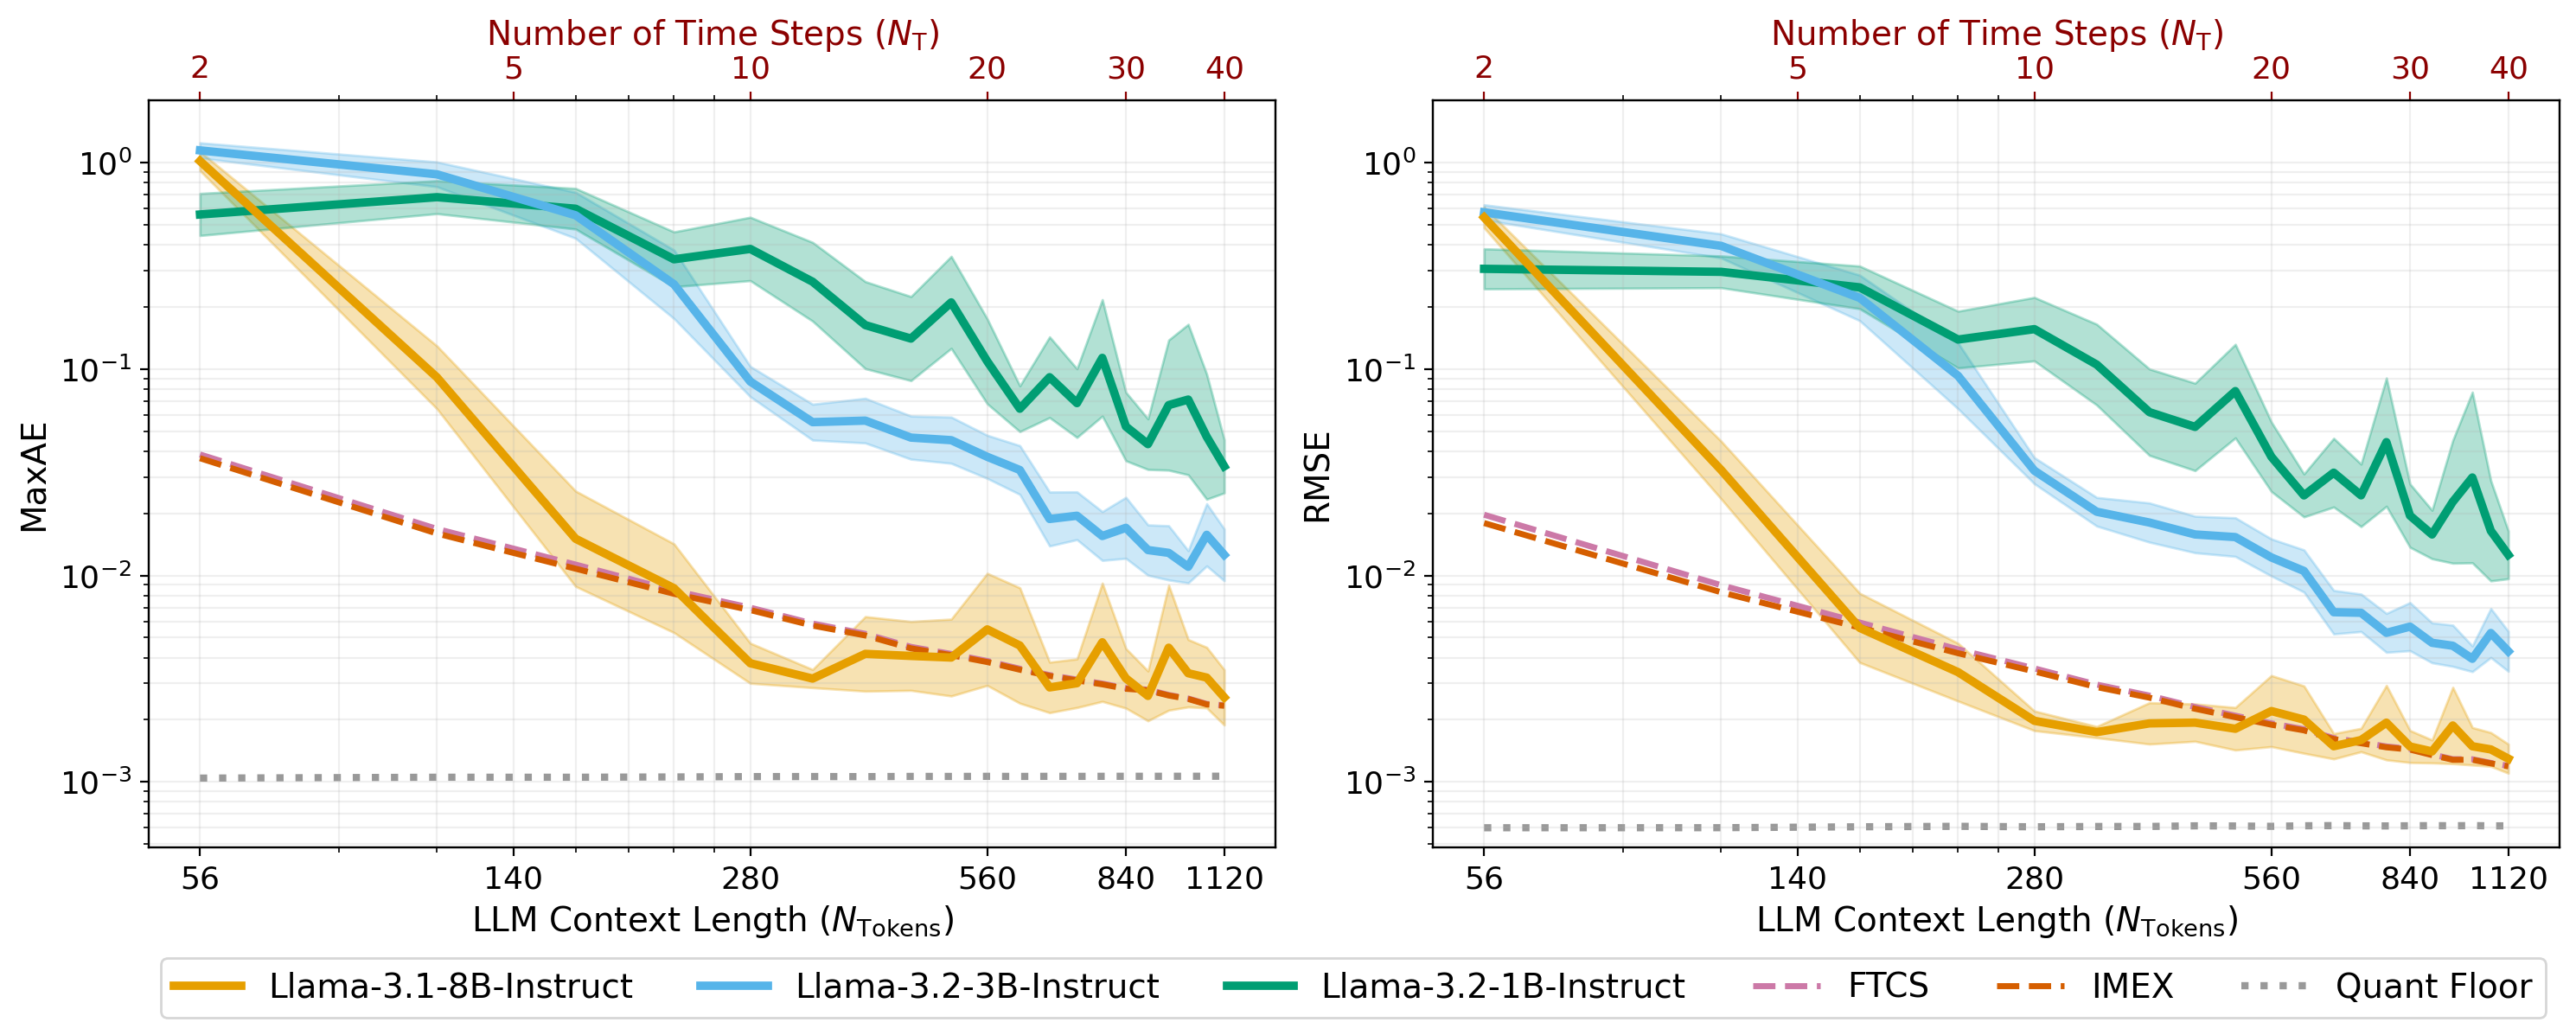

In [2]:
all_Nt_values = range(2, 41, 2)

# Load Llama-3.1-8B-Instruct model data
with np.load("8B_1_step_time_discretization.npz") as data_8b:
    # LLM metrics
    llm_final_max_diff = data_8b["llm_final_max_diff_8B"]
    llm_final_rmse = data_8b["llm_final_rmse_8B"]
    llm_final_max_diff_std = data_8b["llm_final_max_diff_std_8B"]
    llm_final_rmse_std = data_8b["llm_final_rmse_std_8B"]
    # Pre-computed confidence intervals
    lower_max_diff = data_8b["llm_lower_max_diff_log_8B"]
    upper_max_diff = data_8b["llm_upper_max_diff_log_8B"]
    lower_rmse = data_8b["llm_lower_rmse_log_8B"]
    upper_rmse = data_8b["llm_upper_rmse_log_8B"]
    # Finite-difference metrics
    ftcs_final_max_diff = data_8b["ftcs_final_max_diff"]
    ftcs_final_rmse = data_8b["ftcs_final_rmse"]
    imex_final_max_diff = data_8b["imex_final_max_diff"]
    imex_final_rmse = data_8b["imex_final_rmse"]
    # Baseline metrics (Quant Floor)
    temporal_baseline_max_errors = data_8b["temporal_baseline_max_errors"]
    temporal_baseline_rmse_errors = data_8b["temporal_baseline_rmse_errors"]

# Load Llama-3.1-3B-Instruct model data
with np.load("3B_1_step_time_discretization.npz") as data_3b:
    # LLM metrics
    llm_final_max_diff_3B = data_3b["llm_final_max_diff_3B"]
    llm_final_rmse_3B = data_3b["llm_final_rmse_3B"]
    llm_final_max_diff_std_3B = data_3b["llm_final_max_diff_std_3B"]
    llm_final_rmse_std_3B = data_3b["llm_final_rmse_std_3B"]
    # Pre-computed confidence intervals
    lower_max_diff_3B = data_3b["llm_lower_max_diff_log_3B"]
    upper_max_diff_3B = data_3b["llm_upper_max_diff_log_3B"]
    lower_rmse_3B = data_3b["llm_lower_rmse_log_3B"]
    upper_rmse_3B = data_3b["llm_upper_rmse_log_3B"]

# Load Llama-3.1-1B-Instruct model data
with np.load("1B_1_step_time_discretization.npz") as data_1b:
    # LLM metrics
    llm_final_max_diff_1B = data_1b["llm_final_max_diff_1B"]
    llm_final_rmse_1B = data_1b["llm_final_rmse_1B"]
    llm_final_max_diff_std_1B = data_1b["llm_final_max_diff_std_1B"]
    llm_final_rmse_std_1B = data_1b["llm_final_rmse_std_1B"]
    # Pre-computed confidence intervals
    lower_max_diff_1B = data_1b["llm_lower_max_diff_log_1B"]
    upper_max_diff_1B = data_1b["llm_upper_max_diff_log_1B"]
    lower_rmse_1B = data_1b["llm_lower_rmse_log_1B"]
    upper_rmse_1B = data_1b["llm_upper_rmse_log_1B"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=200)
all_Nt_values = range(2, 41, 2)
colors = [
    "#E69F00",  # Llama-3.1-8B 
    "#56B4E9",  # Llama-3.2-3B
    "#009E73",  # Llama-3.2-1B
    "#CC79A7",  # FTCS
    "#D55E00",  # IMEX
    "#999999",  # Reference line
]

# Max Diff Plot
ax1.loglog(all_Nt_values, llm_final_max_diff, '-', label='Llama-3.1-8B-Instruct',
            color=colors[0], linewidth=3.5, zorder=5)
ax1.fill_between(all_Nt_values, lower_max_diff, upper_max_diff,
                  alpha=0.3, color=colors[0])
ax1.loglog(all_Nt_values, llm_final_max_diff_3B, '-', label='Llama-3.2-3B-Instruct',
            color=colors[1], linewidth=3.5, zorder=4)
ax1.fill_between(all_Nt_values, lower_max_diff_3B, upper_max_diff_3B,
                  alpha=0.3, color=colors[1])
ax1.loglog(all_Nt_values, llm_final_max_diff_1B, '-', label='Llama-3.2-1B-Instruct',
            color=colors[2], linewidth=3.5, zorder=3)
ax1.fill_between(all_Nt_values, lower_max_diff_1B, upper_max_diff_1B,
                 alpha=0.3, color=colors[2])
ax1.loglog(all_Nt_values, ftcs_final_max_diff, '--', label='FTCS',
           color=colors[3], linewidth=2.5, zorder=2)
ax1.loglog(all_Nt_values, imex_final_max_diff, '--', label='IMEX',
           color=colors[4], linewidth=2.5, zorder=2)
ax1.loglog(all_Nt_values, temporal_baseline_max_errors, ':',
           color=colors[5], linewidth=3, label='Quant Floor', zorder=1)
ax1.set_ylabel("MaxAE", fontsize=14)
ax1.set_xlabel("LLM Context Length ($N_{\\text{Tokens}}$)", fontsize=14)

# RMSE Plot
ax2.loglog(all_Nt_values, llm_final_rmse, '-', label='Llama-3.1-8B-Instruct',
           color=colors[0], linewidth=3.5, zorder=5)
ax2.fill_between(all_Nt_values, lower_rmse, upper_rmse,
                 alpha=0.3, color=colors[0])
ax2.loglog(all_Nt_values, llm_final_rmse_3B, '-', label='Llama-3.2-3B-Instruct',
           color=colors[1], linewidth=3.5, zorder=4)
ax2.fill_between(all_Nt_values, lower_rmse_3B, upper_rmse_3B,
alpha=0.3, color=colors[1])
ax2.loglog(all_Nt_values, llm_final_rmse_1B, '-', label='Llama-3.2-1B-Instruct',
           color=colors[2], linewidth=3.5, zorder=3)
ax2.fill_between(all_Nt_values, lower_rmse_1B, upper_rmse_1B,
                 alpha=0.3, color=colors[2])
ax2.loglog(all_Nt_values, ftcs_final_rmse, '--', label='FTCS',
           color=colors[3], linewidth=2.5, zorder=2)
ax2.loglog(all_Nt_values, imex_final_rmse, '--', label='IMEX',
           color=colors[4], linewidth=2.5, zorder=2)
ax2.loglog(all_Nt_values, temporal_baseline_rmse_errors, ':',
           color=colors[5], linewidth=3, label='Quant Floor', zorder=1)
ax2.set_xlabel("LLM Context Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax2.set_ylabel("RMSE", fontsize=14)

# Set consistent y limits
y_values = [
    np.min(lower_max_diff), np.min(lower_rmse),
    np.min(lower_max_diff_3B), np.min(lower_rmse_3B),
    np.min(lower_max_diff_1B), np.min(lower_rmse_1B),
    np.min(ftcs_final_max_diff), np.min(ftcs_final_rmse),
    np.min(imex_final_max_diff), np.min(imex_final_rmse),
    np.min(temporal_baseline_max_errors), np.min(temporal_baseline_rmse_errors),
    np.max(temporal_baseline_max_errors), np.max(temporal_baseline_rmse_errors),
    np.max(upper_max_diff), np.max(upper_rmse),
    np.max(upper_max_diff_3B), np.max(upper_rmse_3B),
    np.max(upper_max_diff_1B), np.max(upper_rmse_1B),
    np.max(ftcs_final_max_diff), np.max(ftcs_final_rmse),
    np.max(imex_final_max_diff), np.max(imex_final_rmse),
]
y_min = np.min(y_values) * 0.8
y_max = np.max(y_values) * 1.6
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Bottom x-axis for token counts
key_ticks = [2, 5, 10, 20, 30, 40]
token_ticks = [nt * 28 for nt in key_ticks]
ax1.set_xticks(key_ticks)
ax1.set_xticklabels(token_ticks)
ax2.set_xticks(key_ticks)
ax2.set_xticklabels(token_ticks)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax1.grid(True, which="both", ls="-", alpha=0.2)
ax2.grid(True, which="both", ls="-", alpha=0.2)

# Top x-axis for time steps
ax1_top = ax1.twiny()
ax2_top = ax2.twiny()
ax1_top.set_xlim(ax1.get_xlim())
ax2_top.set_xlim(ax2.get_xlim())
ax1_top.set_xscale('log')
ax2_top.set_xscale('log')
ax1_top.set_xticks(key_ticks)
ax1_top.set_xticklabels(key_ticks)
ax2_top.set_xticks(key_ticks)
ax2_top.set_xticklabels(key_ticks)
ax1_top.set_xlabel("Number of Time Steps ($N_\\text{T}$)", fontsize=14, color='darkred')
ax2_top.set_xlabel("Number of Time Steps ($N_\\text{T}$)", fontsize=14, color='darkred')
ax1_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')
ax2_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6, fontsize=14, handlelength=2,
           bbox_to_anchor=(0.525, 0.0), columnspacing=2)
plt.tight_layout()
plt.subplots_adjust(bottom=0.18, top=0.9)
plt.show()

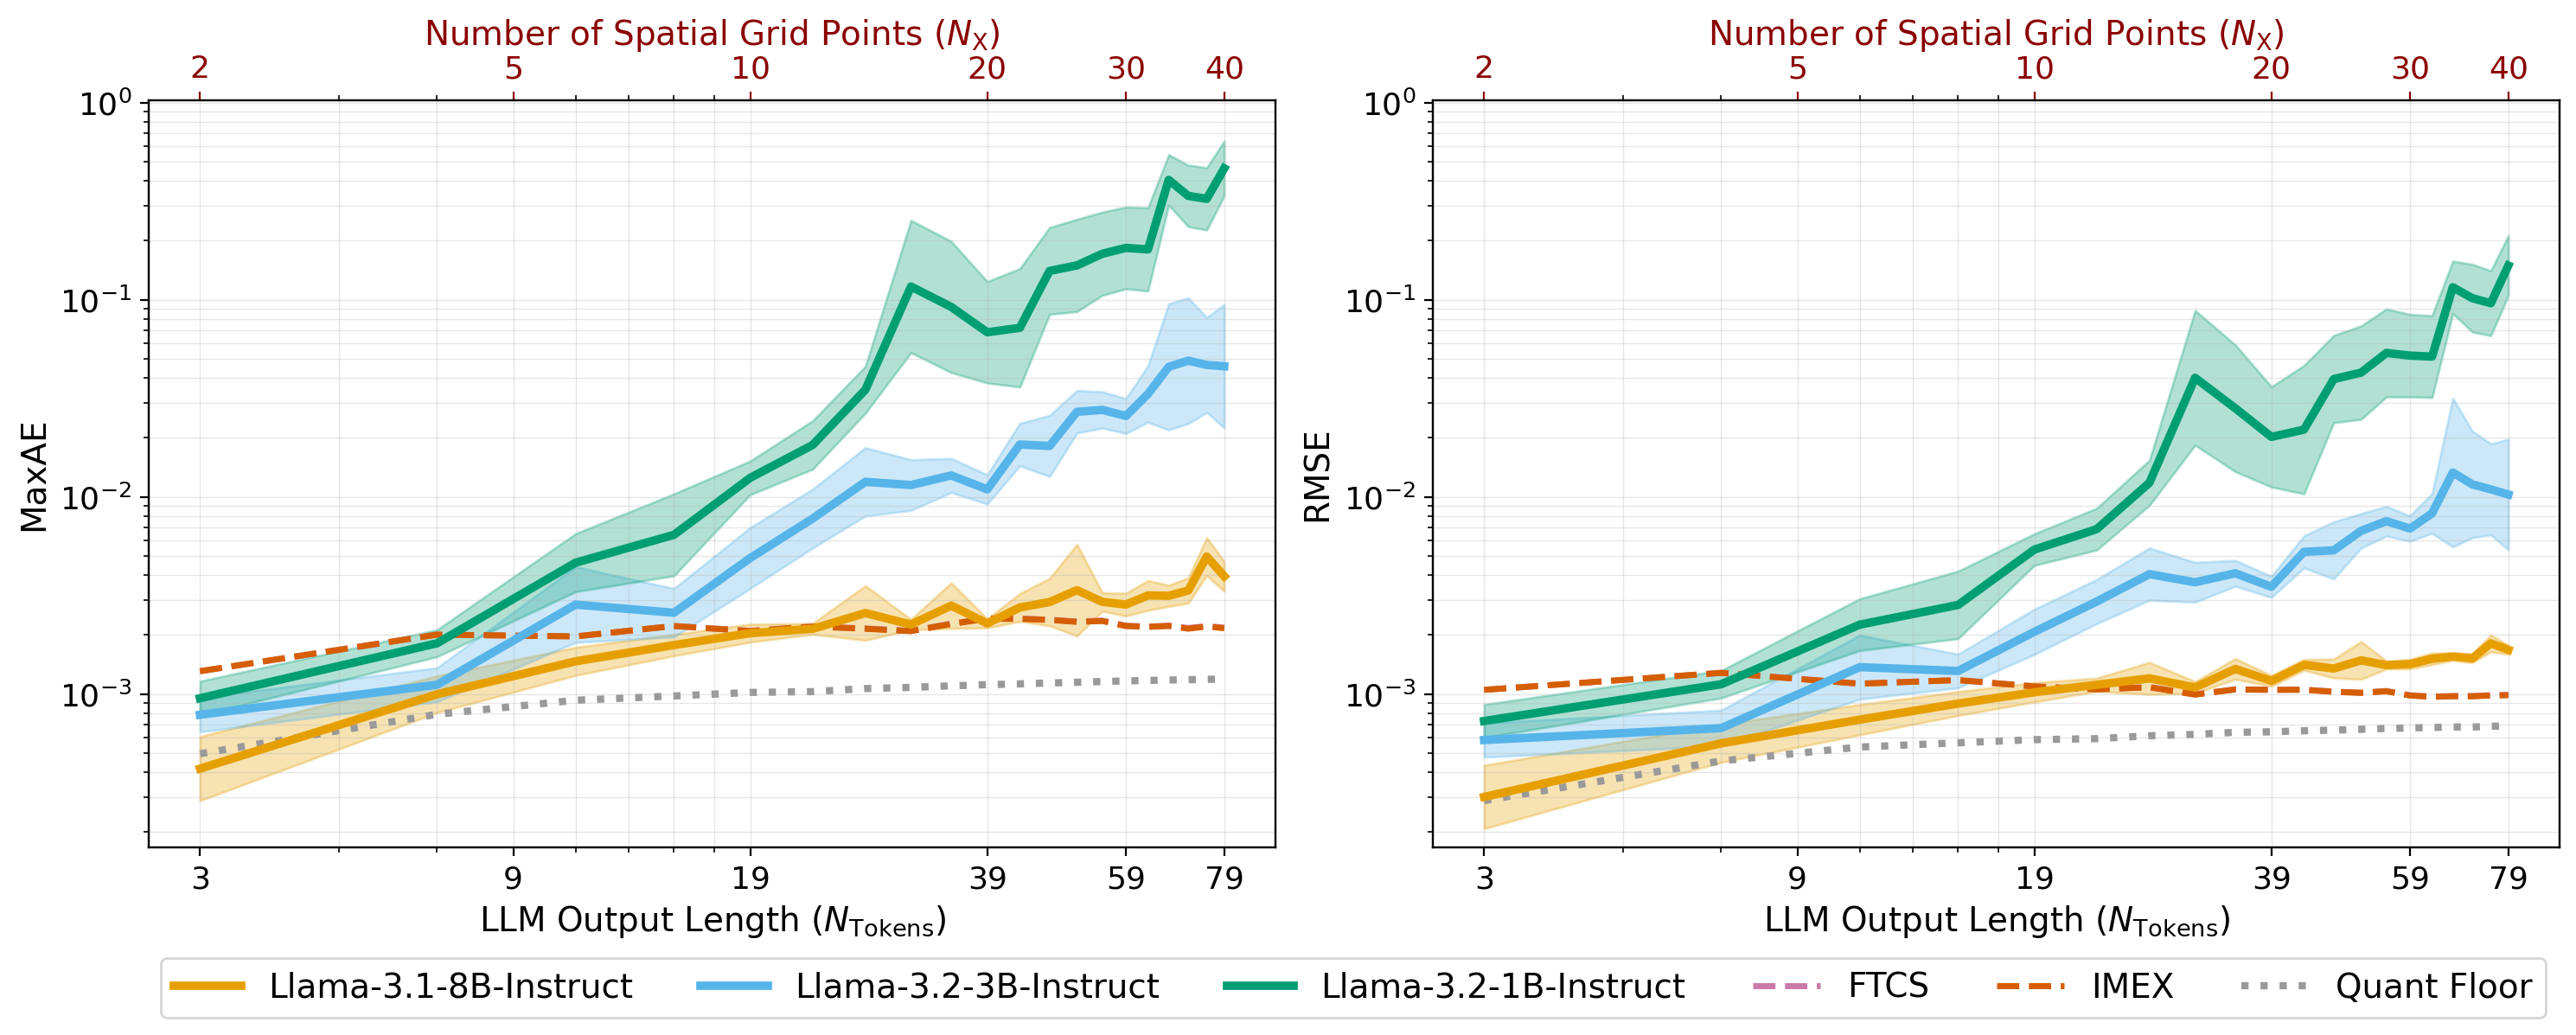

In [3]:
# Load Llama-3.1-8B-Instruct model data
with np.load("8B_1_step_space_discretization.npz") as data_8b:
    # LLM metrics
    llm_final_max_diff = data_8b["llm_final_max_diff_8B"]
    llm_final_rmse = data_8b["llm_final_rmse_8B"]
    llm_final_max_diff_std = data_8b["llm_final_max_diff_std_8B"]
    llm_final_rmse_std = data_8b["llm_final_rmse_std_8B"]
    # Pre-computed confidence intervals
    lower_max_diff = data_8b["llm_lower_max_diff_log_8B"]
    upper_max_diff = data_8b["llm_upper_max_diff_log_8B"]
    lower_rmse = data_8b["llm_lower_rmse_log_8B"]
    upper_rmse = data_8b["llm_upper_rmse_log_8B"]
    # Finite-difference metrics
    ftcs_final_max_diff = data_8b["ftcs_final_max_diff_8B"]
    ftcs_final_rmse = data_8b["ftcs_final_rmse_8B"]
    imex_final_max_diff = data_8b["imex_final_max_diff_8B"]
    imex_final_rmse = data_8b["imex_final_rmse_8B"]
    # Baseline metrics (quant floor)
    spatial_baseline_max_errors = data_8b["spatial_baseline_max_errors"]
    spatial_baseline_rmse_errors = data_8b["spatial_baseline_rmse_errors"]

# Load Llama-3.2-3B-Instruct model data
with np.load("3B_1_step_space_discretization.npz") as data_3b:
    llm_final_max_diff_3B = data_3b["llm_final_max_diff_3B"]
    llm_final_rmse_3B = data_3b["llm_final_rmse_3B"]
    llm_final_max_diff_std_3B = data_3b["llm_final_max_diff_std_3B"]
    llm_final_rmse_std_3B = data_3b["llm_final_rmse_std_3B"]
    # Pre-computed confidence intervals
    lower_max_diff_3B = data_3b["llm_lower_max_diff_log_3B"]
    upper_max_diff_3B = data_3b["llm_upper_max_diff_log_3B"]
    lower_rmse_3B = data_3b["llm_lower_rmse_log_3B"]
    upper_rmse_3B = data_3b["llm_upper_rmse_log_3B"]

# Load Llama-3.2-1B-Instruct model data
with np.load("1B_1_step_space_discretization.npz") as data_1b:
    llm_final_max_diff_1B = data_1b["llm_final_max_diff_1B"]
    llm_final_rmse_1B = data_1b["llm_final_rmse_1B"]
    llm_final_max_diff_std_1B = data_1b["llm_final_max_diff_std_1B"]
    llm_final_rmse_std_1B = data_1b["llm_final_rmse_std_1B"]
    # Pre-computed confidence intervals
    lower_max_diff_1B = data_1b["llm_lower_max_diff_log_1B"]
    upper_max_diff_1B = data_1b["llm_upper_max_diff_log_1B"]
    lower_rmse_1B = data_1b["llm_lower_rmse_log_1B"]
    upper_rmse_1B = data_1b["llm_upper_rmse_log_1B"]


all_Nx_values = range(2, 41, 2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=200)
# Max Diff Plot
ax1.loglog(all_Nx_values, llm_final_max_diff, '-', label='Llama-3.1-8B-Instruct',
            color=colors[0], linewidth=3.5, zorder=5)
ax1.fill_between(all_Nx_values, lower_max_diff, upper_max_diff, alpha=0.3, color=colors[0])
ax1.loglog(all_Nx_values, llm_final_max_diff_3B, '-', label='Llama-3.2-3B-Instruct',
            color=colors[1], linewidth=3.5, zorder=4)
ax1.fill_between(all_Nx_values, lower_max_diff_3B, upper_max_diff_3B, alpha=0.3, color=colors[1])
ax1.loglog(all_Nx_values, llm_final_max_diff_1B, '-', label='Llama-3.2-1B-Instruct',
            color=colors[2], linewidth=3.5, zorder=3)
ax1.fill_between(all_Nx_values, lower_max_diff_1B, upper_max_diff_1B, alpha=0.3, color=colors[2])
ax1.loglog(all_Nx_values, ftcs_final_max_diff, '--', label='FTCS',
            color=colors[3], linewidth=2.5, zorder=2)
ax1.loglog(all_Nx_values, imex_final_max_diff, '--', label='IMEX',
            color=colors[4], linewidth=2.5, zorder=2)
ax1.loglog(all_Nx_values, spatial_baseline_max_errors, ':', 
            color=colors[5], linewidth=3, label='Quant Floor', zorder=1)
ax1.set_ylabel("MaxAE", fontsize=14)
ax1.set_xlabel("LLM Output Length ($N_{\\text{Tokens}}$)", fontsize=14)

# RMSE Plot
ax2.loglog(all_Nx_values, llm_final_rmse, '-', label='Llama-3.1-8B-Instruct',
            color=colors[0], linewidth=3.5, zorder=5)
ax2.fill_between(all_Nx_values, lower_rmse, upper_rmse, alpha=0.3, color=colors[0])
ax2.loglog(all_Nx_values, llm_final_rmse_3B, '-', label='Llama-3.2-3B-Instruct',
            color=colors[1], linewidth=3.5, zorder=4)
ax2.fill_between(all_Nx_values, lower_rmse_3B, upper_rmse_3B, alpha=0.3, color=colors[1])
ax2.loglog(all_Nx_values, llm_final_rmse_1B, '-', label='Llama-3.2-1B-Instruct',
            color=colors[2], linewidth=3.5, zorder=3)
ax2.fill_between(all_Nx_values, lower_rmse_1B, upper_rmse_1B, alpha=0.3, color=colors[2])
ax2.loglog(all_Nx_values, ftcs_final_rmse, '--', label='FTCS',
            color=colors[3], linewidth=2.5, zorder=2)
ax2.loglog(all_Nx_values, imex_final_rmse, '--', label='IMEX',
            color=colors[4], linewidth=2.5, zorder=2)
ax2.loglog(all_Nx_values, spatial_baseline_rmse_errors, ':', 
            color=colors[5], linewidth=3, label='Quant Floor', zorder=1)
ax2.set_xlabel("LLM Output Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax2.set_ylabel("RMSE", fontsize=14)

# Set consistent y limits
y_values = [
    np.min(lower_max_diff), np.min(lower_rmse),
    np.min(lower_max_diff_3B), np.min(lower_rmse_3B),
    np.min(lower_max_diff_1B), np.min(lower_rmse_1B),
    np.min(ftcs_final_max_diff), np.min(ftcs_final_rmse),
    np.min(imex_final_max_diff), np.min(imex_final_rmse),
    np.min(spatial_baseline_max_errors), np.min(spatial_baseline_rmse_errors),
    np.max(spatial_baseline_max_errors), np.max(spatial_baseline_rmse_errors),
    np.max(upper_max_diff), np.max(upper_rmse),
    np.max(upper_max_diff_3B), np.max(upper_rmse_3B),
    np.max(upper_max_diff_1B), np.max(upper_rmse_1B),
    np.max(ftcs_final_max_diff), np.max(ftcs_final_rmse),
    np.max(imex_final_max_diff), np.max(imex_final_rmse),
]
y_min = np.min(y_values) * 0.8
y_max = np.max(y_values) * 1.6
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Bottom x-axis for token counts
key_ticks = [2, 5, 10, 20, 30, 40]
token_ticks = [2*nx -1 for nx in key_ticks]
ax1.set_xticks(key_ticks)
ax1.set_xticklabels(token_ticks)
ax2.set_xticks(key_ticks)
ax2.set_xticklabels(token_ticks)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)

# Top x-axis for spatial points
ax1_top = ax1.twiny()
ax2_top = ax2.twiny()
ax1_top.set_xscale('log')
ax2_top.set_xscale('log')
ax1_top.set_xlim(ax1.get_xlim())
ax2_top.set_xlim(ax2.get_xlim())
ax1_top.set_xticks(key_ticks)
ax1_top.set_xticklabels(key_ticks)
ax2_top.set_xticks(key_ticks)
ax2_top.set_xticklabels(key_ticks)
ax1_top.set_xlabel("Number of Spatial Grid Points ($N_\\text{X}$)", fontsize=14, color='darkred')
ax2_top.set_xlabel("Number of Spatial Grid Points ($N_\\text{X}$)", fontsize=14, color='darkred')
ax1_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')
ax2_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')
ax1.grid(True, which='both', alpha=0.3, linestyle='-', linewidth=0.5)
ax2.grid(True, which='both', alpha=0.3, linestyle='-', linewidth=0.5)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6, fontsize=14, handlelength=2,
           bbox_to_anchor=(0.525, 0.0), columnspacing=2)
plt.tight_layout()
plt.subplots_adjust(bottom=0.18, top=0.9)
plt.show()